In [1]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [2]:
tratamento = pd.read_csv("anova.csv", sep=";")

In [3]:
tratamento

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7
5,M,A,6
6,M,A,9
7,M,A,9
8,F,B,5
9,F,B,5


In [4]:
tratamento.boxplot(by="Remedio", grid=False)

In [5]:
modelo1 = ols("Horas ~ Remedio", data=tratamento).fit()
resultados1 = sm.stats.anova_lm(modelo1)
resultados1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [6]:
modelo2 = ols("Horas ~ Remedio * Sexo", data=tratamento).fit()
resultados2 = sm.stats.anova_lm(modelo2)
resultados2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


In [7]:
mc = MultiComparison(tratamento["Horas"],tratamento["Remedio"])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   -0.625 0.7861 -3.0803 1.8303  False
     A      C    0.375    0.9 -2.0803 2.8303  False
     B      C      1.0 0.5668 -1.4553 3.4553  False
---------------------------------------------------


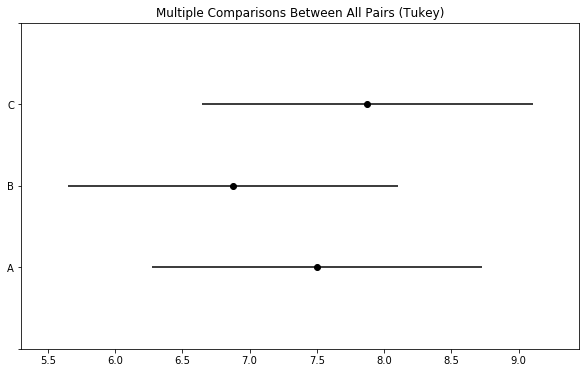

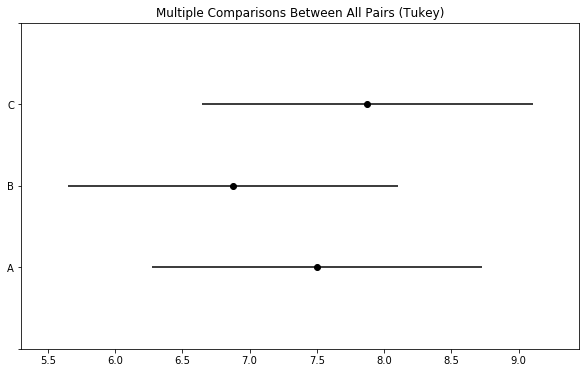

In [8]:
resultado_teste.plot_simultaneous()